In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data = pd.read_csv("data.csv",sep='\t')

In [3]:
tipis_l = [f'TIPI{i+1}' for i in range(10)]
q_l = [f'Q{i+1}A' for i in range(42)]

f_data = raw_data.loc[(raw_data.VCL6 == 0) & (raw_data.VCL9 == 0) & (raw_data.VCL12==0)
                      & (raw_data.uniquenetworklocation==1),raw_data.columns.isin(tipis_l+q_l)]

In [4]:
tipis_l = [f'TIPI{i+1}' for i in range(10)]

for tipi in tipis_l:
    f_data = f_data.loc[~(f_data[tipi]==0),:]
    
f_data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,4,4,2,4,4,4,4,4,2,1,...,1,5,7,7,7,7,7,5,1,1
1,4,1,2,3,4,4,3,4,3,2,...,6,5,4,7,5,4,7,7,1,5
2,3,1,4,1,4,3,1,3,2,4,...,2,5,2,2,5,6,5,5,3,2
3,2,3,2,1,3,3,4,2,3,3,...,1,1,7,4,6,4,6,1,6,1
5,1,1,2,1,3,1,1,3,3,2,...,2,1,6,1,7,7,7,2,6,7


In [16]:
categories = ['Extraverted, enthusiastic','Critical, quarrelsome','Dependable, self-disciplined', 'Anxious, easily upset',
              'Open to new experiences, complex', 'Reserved, quiet', 'Sympathetic, warm', 'Disorganized, careless',
              'Calm, emotionally stable', 'Conventional, uncreative']

q1 = [np.quantile(f_data.TIPI1, .25), np.quantile(f_data.TIPI2, .25), np.quantile(f_data.TIPI3, .25),
      np.quantile(f_data.TIPI4, .25), np.quantile(f_data.TIPI5, .25), np.quantile(f_data.TIPI6, .25),
      np.quantile(f_data.TIPI7, .25), np.quantile(f_data.TIPI8, .25), np.quantile(f_data.TIPI9, .25),
      np.quantile(f_data.TIPI10, .25), 0]

q2 = [np.quantile(f_data.TIPI1, .5), np.quantile(f_data.TIPI2, .5), np.quantile(f_data.TIPI3, .5),
      np.quantile(f_data.TIPI4, .5), np.quantile(f_data.TIPI5, .5), np.quantile(f_data.TIPI6, .5),
      np.quantile(f_data.TIPI7, .5), np.quantile(f_data.TIPI8, .5), np.quantile(f_data.TIPI9, .5),
      np.quantile(f_data.TIPI10, .5), 0]

q3 = [np.quantile(f_data.TIPI1, .75), np.quantile(f_data.TIPI2, .75), np.quantile(f_data.TIPI3, .75),
      np.quantile(f_data.TIPI4, .75), np.quantile(f_data.TIPI5, .75), np.quantile(f_data.TIPI6, .75),
      np.quantile(f_data.TIPI7, .75), np.quantile(f_data.TIPI8, .75), np.quantile(f_data.TIPI9, .75),
      np.quantile(f_data.TIPI10, .75), 0]

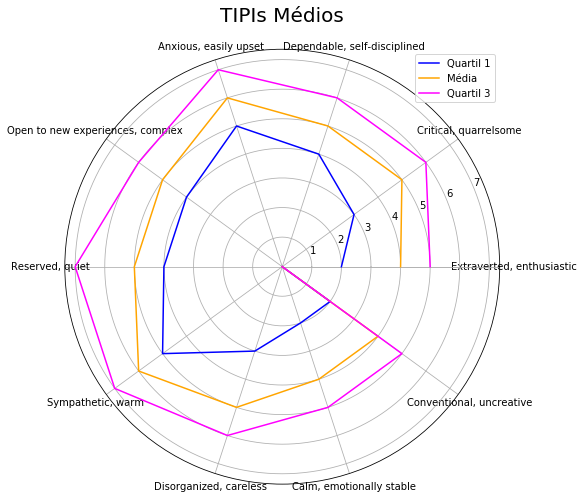

In [18]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=11)

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
#for d in range(len(f_data)):
#    plt.plot(label_loc, [f_data[f'TIPI{i+1}'] for i in range(10)], label='', alpha=0.0003, color='magenta')
plt.plot(label_loc, q1, label='Quartil 1', alpha=1, color='blue')
plt.plot(label_loc, q2, label='Média', alpha=1, color='orange')
plt.plot(label_loc, q3, label='Quartil 3', alpha=1, color='magenta')
plt.title('TIPIs Médios', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()